# Gathering Dataset

## Dataset Overview:

This dataset contains a collection of avocado images categorized into three primary maturity levels:

1. RAW: Images of avocados in their raw, unripe condition.
2. Half-cooked: Images of avocados in a half-ripe, intermediate condition.
3. RIPE: Images of avocados in their fully ripe condition.

Each category's images are organized into corresponding folders named "RAW," "Half-cooked," and "RIPE." This structured organization facilitates efficient access and utilization for machine learning tasks.

Purpose:

The dataset is intended for training and testing Convolutional Neural Network (CNN) models, specifically leveraging the ResNet-50 architecture, to achieve automatic classification of avocado images based on their maturity level. The ultimate objective is to develop a model capable of accurately distinguishing between raw, half-ripe, and ripe avocados from images.

Dataset Source:

The dataset is publicly available and can be accessed via Kaggle: Classification Nutritional Levels in Avocados (https://www.kaggle.com/datasets/gery17/classification-nutritional-levels-in-avocados).


## Import Library 


The libraries mentioned below are popular Python libraries commonly used for data processing and file management. They also play a crucial role in Convolutional Neural Network (CNN) algorithms.

`numpy` is a highly efficient library for mathematical and algebraic operations, helping us manipulate arrays and matrices often used in calculating parameters and gradients in CNNs.

`pandas` provides robust data structures like DataFrames, making it easier to manipulate, analyze, and clean data before using it in a CNN model.

`os is a standard module for interacting with the operating system, assisting in managing files and directories, such as accessing datasets and saving model training results.

These three libraries support various aspects of developing and implementing CNN algorithms, from data preparation to storing models and prediction results.

**`NOTE`**

The additional libraries that I will import will be adjusted according to the needs and steps that I will undertake.

In [1]:
import numpy as np
import pandas as pd
import os

## Explanatory Data Analysis (Cleaning & Organizing Data)

### Load Data Image

This section demonstrates how to import the Python library PIL (Python Imaging Library) for image manipulation, and how to load and display images from a file. The loaded image is also shown as the final output. 

Image Dimensions:  (960, 768)


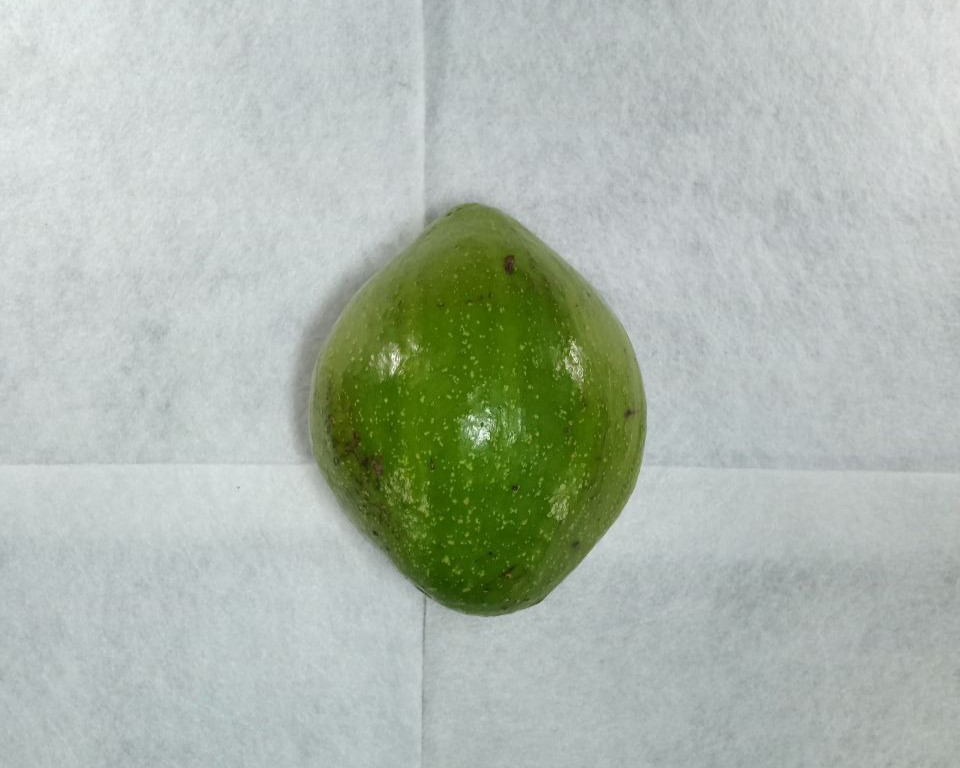

In [2]:
from PIL import Image
pth = 'dataset/'

# raw avocado
Raw_image_path = pth+'Raw/Alpukat_buah1 (1).jpg'
Raw_image = Image.open(Raw_image_path)
print("Image Dimensions: ", Raw_image.size)
Raw_image

Image Dimensions:  (960, 768)


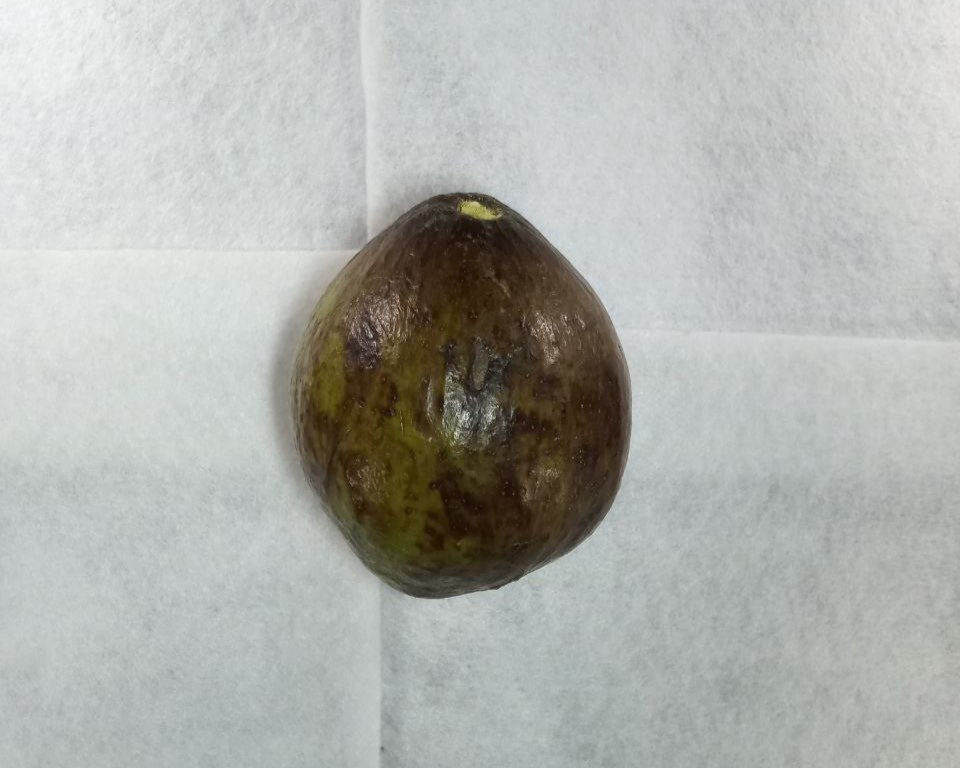

In [3]:
from PIL import Image
pth = 'dataset/'

# half-ripe
HalfRipe_image_path = pth+'HalfRipe/Alpukat_buah1 (1).jpg'
HalfRipe_image = Image.open(HalfRipe_image_path)
print("Image Dimensions: ", HalfRipe_image.size)
HalfRipe_image

Image Dimensions:  (960, 768)


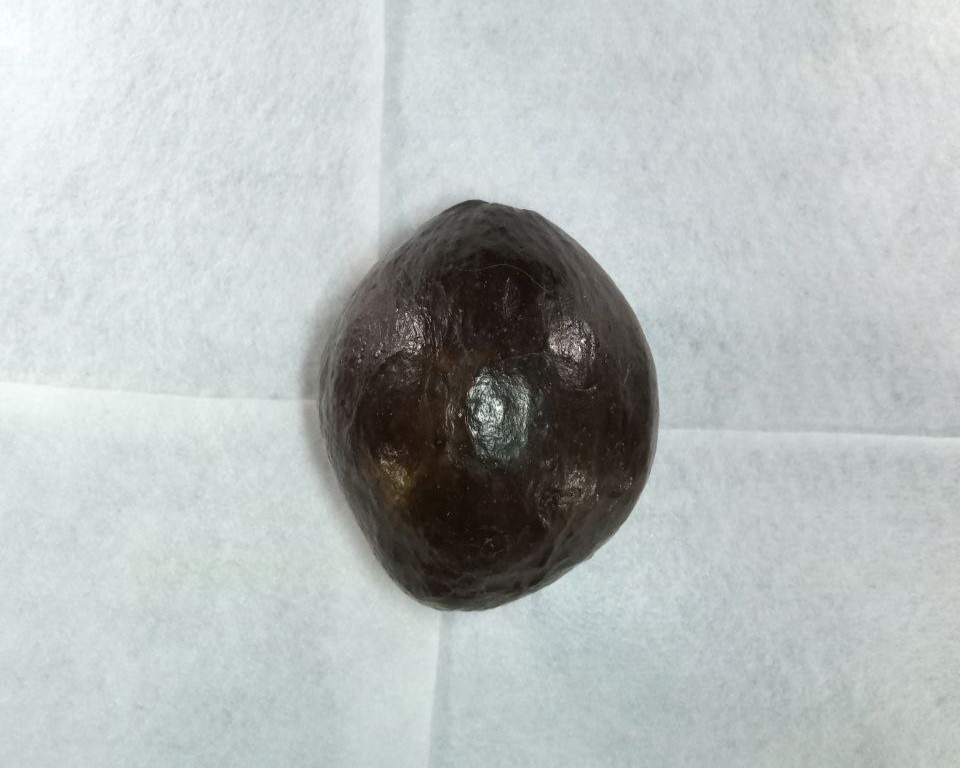

In [4]:
from PIL import Image
pth = 'dataset/'

# Ripe avocado
Ripe_image_path = pth+'Ripe/Alpukat_buah1 (1).jpg'
Ripe_image = Image.open(Ripe_image_path)
print("Image Dimensions: ", Ripe_image.size)
Ripe_image

### Split Folder Data Test & Train

In this section I will divide the dataset into training data and test data with a specified ratio. First, the `shutil` and `random` modules are imported for file management and data randomization. Then, I specified the folder paths for the Raw, Half Ripe and Ripe data and, as well as the paths for the training and test data. The script then checks whether the training and test data folders already exist. Otherwise, the dataset will be split according to the ratio specified using the `split_dataset` function. The `split_dataset` function takes the source folder path, training folder path, test folder path and split ratio as parameters. In this function, the images in the source folder are shuffled, then moved to the training and testing folders according to the specified ratio. After the dataset splitting process is complete, a message will appear indicating that the dataset has been successfully divided. If the training and test data folders already exist, a message will indicate that the data splitting process will be skipped when the program is run again to avoid redundancy.

In [5]:
import shutil
import random

# Define the paths for the data folders
raw_folder = 'dataset/Raw/'
halfripe_folder = 'dataset/HalfRipe/'
Ripe_folder = 'dataset/Ripe/'

# Define the paths for the train and test data folders
train_folder = 'dataset/train/'
test_folder = 'dataset/test/'

# Check if train and test folders already exist
train_exists = os.path.exists(train_folder)
test_exists = os.path.exists(test_folder)

# If train and test folders don't exist, split the dataset
if not (train_exists and test_exists):
    # Create the train and test data folders
    os.makedirs(train_folder + 'Raw/', exist_ok=True)
    os.makedirs(train_folder + 'HalfRipe/', exist_ok=True)
    os.makedirs(train_folder + 'Ripe/', exist_ok=True)
    os.makedirs(test_folder + 'Raw/', exist_ok=True)
    os.makedirs(test_folder + 'HalfRipe/', exist_ok=True)
    os.makedirs(test_folder + 'Ripe/', exist_ok=True)

    # Function to split the dataset
    def split_dataset(source_folder, train_folder, test_folder, split_ratio):
        images = os.listdir(source_folder)
        random.shuffle(images)
        split_index = int(len(images) * split_ratio)

        # Move images to the train folder
        for image in images[:split_index]:
            src = os.path.join(source_folder, image)
            dest = os.path.join(train_folder, image)
            shutil.copyfile(src, dest)
            print("Moved", image, "to train folder")

        # Move images to the test folder
        for image in images[split_index:]:
            src = os.path.join(source_folder, image)
            dest = os.path.join(test_folder, image)
            shutil.copyfile(src, dest)
            print("Moved", image, "to test folder")

    # Split the raw dataset
    split_ratio = 0.8
    split_dataset(raw_folder, train_folder + 'Raw/', test_folder + 'Raw/', split_ratio)

    # Split the half-ripe dataset
    split_dataset(halfripe_folder, train_folder + 'HalfRipe/', test_folder + 'HalfRipe/', split_ratio)
    
    # Split the ripe dataset
    split_dataset(Ripe_folder, train_folder + 'Ripe/', test_folder + 'Ripe/', split_ratio)

    print("Dataset successfully split into train and test data.")
else:
    print("Train and test data folders already exist. Skipping data splitting.")

Train and test data folders already exist. Skipping data splitting.


### "Exploring Image Properties: Dimensions and Modes"

In this section, I'll be loading syntax aimed at exploring image properties, such as dimensions and modes, within a dataset. First, the directory paths for the training (train) and testing (test) data are set using the variable `pth`. Then, using the `os` and `Image` modules from the Pillow library, images within those folders are read. Each image is processed to extract its dimensions (length and width) and mode (e.g., RGB or grayscale), which are then stored in the unique sets `unique_dimensions` and `unique_modes`, respectively. Information about image mode and dimensions aids in further processing and adjustments during model development or dataset analysis.

This syntax aims to gather information about the dimensions and modes of images present in the training and testing datasets. Firstly, the directory paths for the training and testing datasets are retrieved from the variable `pth` and stored in `train_dir` and `test_dir`, respectively. The `itertools` module is utilized to merge the lists obtained from `os.listdir(train_dir)` and `os.listdir(test_dir)` so they can be iterated through simultaneously. Subsequently, an iteration is performed through all images within both directories. Each image is opened using `Image.open()` from the `PIL` module, and its dimensions are added to the `unique_dimensions` set, while its mode is added to the `unique_modes` set. Once the iteration is completed, the number of unique modes and unique dimensions in the dataset are printed.

In [6]:
train_dir = pth+"train"
test_dir = pth+"test"

### check and clean images

This function reads each file in the given folder, checks if it's an image, converts images that are not in RGB mode to RGB mode, and removes corrupted or damaged images.

In [8]:
# Function to check and clean images
def check_and_clean_images(folder_path):
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            with Image.open(file_path) as img:
                # Convert image to RGB if not already
                if img.mode != 'RGB':
                    img = img.convert('RGB')
                    img.save(file_path)
        except Exception as e:
            print(f"Removing corrupted image {filename}: {e}")
            os.remove(file_path)

# Clean images in the raw, halfripe, and ripe folders
check_and_clean_images(raw_folder)
check_and_clean_images(halfripe_folder)
check_and_clean_images(Ripe_folder)

###  Further Cleaning

In [9]:
# Further Cleaning: Ensuring consistency in image dimensions and modes
def resize_images(folder_path, target_size=(128, 128)):
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    img = img.resize(target_size, Image.ANTIALIAS)
                    img.save(file_path)
            except Exception as e:
                print(f"Error resizing image {file_path}: {e}")

resize_images(pth + 'train/raw/')
resize_images(pth + 'train/halfripe/')
resize_images(pth + 'train/ripe/')
resize_images(pth + 'test/raw/')
resize_images(pth + 'test/halfripe/')
resize_images(pth + 'test/ripe/')

C:\Users\Dila\AppData\Local\Temp\ipykernel_12768\2473660016.py:8: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize(target_size, Image.ANTIALIAS)


In [10]:
# Creating set of dimensions
unique_dimensions = set()
unique_modes = set()

In [11]:
# Iterating through all images in train and test folders
for root, dirs, files in os.walk(train_folder):
    for file in files:
        file_path = os.path.join(root, file)
        image = Image.open(file_path)
        # Adding shape and mode of given image to sets
        unique_dimensions.add(image.size)
        unique_modes.add(image.mode)

for root, dirs, files in os.walk(test_folder):
    for file in files:
        file_path = os.path.join(root, file)
        image = Image.open(file_path)
        # Adding shape and mode of given image to sets
        unique_dimensions.add(image.size)
        unique_modes.add(image.mode)

print("Unique modes:", unique_modes)
print("Unique dimensions:", unique_dimensions)

Unique modes: {'RGB'}
Unique dimensions: {(128, 128)}


After the iteration process, we obtain detailed information about the processed image dataset. Firstly, from the iteration result, we get a list of unique image modes, namely 'RGB'. The 'RGB' mode represents images with Red, Green, and Blue color channels without transparency information. Additionally, we also obtain a list of unique image dimensions, which are 128 pixels. This indicates that the dataset consists of images with a single dimension, each having a width and height of 128 pixels. Thus, this output provides valuable insights into the basic characteristics of the processed image dataset, enabling further analysis of the types and sizes of images present in the dataset.